# Homework-3: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [5]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [6]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [11]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [12]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [10]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][550]	 Training Loss 0.4183	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.4111	 Accuracy 0.2284
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2269	 A

Epoch [7][20]	 Batch [500][550]	 Training Loss 0.0117	 Accuracy 0.9078

Epoch [7]	 Average training loss 0.0116	 Average training accuracy 0.9081
Epoch [7]	 Average validation loss 0.0098	 Average validation accuracy 0.9310

Epoch [8][20]	 Batch [0][550]	 Training Loss 0.0094	 Accuracy 0.9500
Epoch [8][20]	 Batch [50][550]	 Training Loss 0.0107	 Accuracy 0.9196
Epoch [8][20]	 Batch [100][550]	 Training Loss 0.0109	 Accuracy 0.9145
Epoch [8][20]	 Batch [150][550]	 Training Loss 0.0112	 Accuracy 0.9111
Epoch [8][20]	 Batch [200][550]	 Training Loss 0.0112	 Accuracy 0.9123
Epoch [8][20]	 Batch [250][550]	 Training Loss 0.0112	 Accuracy 0.9129
Epoch [8][20]	 Batch [300][550]	 Training Loss 0.0112	 Accuracy 0.9132
Epoch [8][20]	 Batch [350][550]	 Training Loss 0.0112	 Accuracy 0.9123
Epoch [8][20]	 Batch [400][550]	 Training Loss 0.0112	 Accuracy 0.9120
Epoch [8][20]	 Batch [450][550]	 Training Loss 0.0112	 Accuracy 0.9116
Epoch [8][20]	 Batch [500][550]	 Training Loss 0.0113	 Accuracy 0.91

Epoch [16][20]	 Batch [350][550]	 Training Loss 0.0097	 Accuracy 0.9212
Epoch [16][20]	 Batch [400][550]	 Training Loss 0.0097	 Accuracy 0.9211
Epoch [16][20]	 Batch [450][550]	 Training Loss 0.0097	 Accuracy 0.9211
Epoch [16][20]	 Batch [500][550]	 Training Loss 0.0098	 Accuracy 0.9203

Epoch [16]	 Average training loss 0.0097	 Average training accuracy 0.9203
Epoch [16]	 Average validation loss 0.0083	 Average validation accuracy 0.9410

Epoch [17][20]	 Batch [0][550]	 Training Loss 0.0080	 Accuracy 0.9500
Epoch [17][20]	 Batch [50][550]	 Training Loss 0.0090	 Accuracy 0.9298
Epoch [17][20]	 Batch [100][550]	 Training Loss 0.0092	 Accuracy 0.9258
Epoch [17][20]	 Batch [150][550]	 Training Loss 0.0095	 Accuracy 0.9226
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.0095	 Accuracy 0.9232
Epoch [17][20]	 Batch [250][550]	 Training Loss 0.0095	 Accuracy 0.9234
Epoch [17][20]	 Batch [300][550]	 Training Loss 0.0095	 Accuracy 0.9231
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0096	

In [11]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9291.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [13]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [13]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.4057	 Accuracy 0.1200
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0764	 Accuracy 0.5049
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0520	 Accuracy 0.6171
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0427	 Accuracy 0.6736
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0371	 Accuracy 0.7124
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0334	 Accuracy 0.7403
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0307	 Accuracy 0.7601
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0287	 Accuracy 0.7742
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0270	 Accuracy 0.7872
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0256	 Accuracy 0.7979
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0245	 Accuracy 0.8061

Epoch [0]	 Average training loss 0.0235	 Average training accuracy 0.8140
Epoch [0]	 Average validation loss 0.0116	 Average validation accuracy 0.9228

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0111	 Accuracy 0.9400


Epoch [8]	 Average training loss 0.0072	 Average training accuracy 0.9492
Epoch [8]	 Average validation loss 0.0065	 Average validation accuracy 0.9624

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0062	 Accuracy 0.9700
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0066	 Accuracy 0.9557
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0068	 Accuracy 0.9536
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0070	 Accuracy 0.9524
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0069	 Accuracy 0.9526
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0069	 Accuracy 0.9528
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0069	 Accuracy 0.9524
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0069	 Accuracy 0.9521
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0069	 Accuracy 0.9522
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0069	 Accuracy 0.9526
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0070	 Accuracy 0.9518

Epoch [9]	 Average training loss 0.0070	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0058	 Accuracy 0.9647
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0058	 Accuracy 0.9648
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0058	 Accuracy 0.9642

Epoch [17]	 Average training loss 0.0058	 Average training accuracy 0.9641
Epoch [17]	 Average validation loss 0.0055	 Average validation accuracy 0.9678

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0054	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0054	 Accuracy 0.9680
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0055	 Accuracy 0.9667
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0057	 Accuracy 0.9658
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0056	 Accuracy 0.9659
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0056	 Accuracy 0.9661
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0057	 Accuracy 0.9652
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0057	 Accuracy 0.9656
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0057	

In [14]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9634.



## Plot

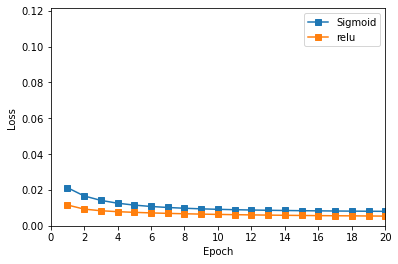

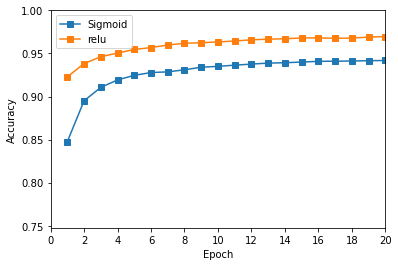

In [15]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [17]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [18]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2318	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.2325	 Accuracy 0.2800
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2253	 Accuracy 0.3846
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.2210	 Accuracy 0.4544
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.2172	 Accuracy 0.5144
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.2142	 Accuracy 0.5614
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.2115	 Accuracy 0.5976
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.2094	 Accuracy 0.6238
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.2076	 Accuracy 0.6468
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.2060	 Accuracy 0.6651
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.2045	 Accuracy 0.6805

Epoch [0]	 Average training loss 0.2031	 Average training accuracy 0.6938
Epoch [0]	 Average validation loss 0.1861	 Average validation accuracy 0.8776

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1864	 Accuracy 0.9000


Epoch [8]	 Average training loss 0.1693	 Average training accuracy 0.9135
Epoch [8]	 Average validation loss 0.1658	 Average validation accuracy 0.9390

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.1661	 Accuracy 0.9400
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1676	 Accuracy 0.9233
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1679	 Accuracy 0.9194
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1684	 Accuracy 0.9160
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1685	 Accuracy 0.9175
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1684	 Accuracy 0.9178
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1684	 Accuracy 0.9179
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1686	 Accuracy 0.9170
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1686	 Accuracy 0.9168
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1687	 Accuracy 0.9169
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1687	 Accuracy 0.9160

Epoch [9]	 Average training loss 0.1687	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.1659	 Accuracy 0.9256
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.1660	 Accuracy 0.9256
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.1661	 Accuracy 0.9247

Epoch [17]	 Average training loss 0.1660	 Average training accuracy 0.9248
Epoch [17]	 Average validation loss 0.1630	 Average validation accuracy 0.9448

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.1630	 Accuracy 0.9400
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.1647	 Accuracy 0.9314
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.1650	 Accuracy 0.9283
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.1655	 Accuracy 0.9251
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.1655	 Accuracy 0.9269
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.1655	 Accuracy 0.9273
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.1655	 Accuracy 0.9269
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.1657	 Accuracy 0.9261
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.1658	

### Test

In [19]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9310.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [15]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [21]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2453	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.2130	 Accuracy 0.4406
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2031	 Accuracy 0.5812
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.1972	 Accuracy 0.6492
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.1928	 Accuracy 0.6969
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.1895	 Accuracy 0.7275
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.1870	 Accuracy 0.7501
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.1851	 Accuracy 0.7655
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.1834	 Accuracy 0.7789
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.1820	 Accuracy 0.7898
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.1809	 Accuracy 0.7984

Epoch [0]	 Average training loss 0.1798	 Average training accuracy 0.8067
Epoch [0]	 Average validation loss 0.1640	 Average validation accuracy 0.9226

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1629	 Accuracy 0.9400

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.1559	 Accuracy 0.9600
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1590	 Accuracy 0.9522
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1593	 Accuracy 0.9495
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1597	 Accuracy 0.9482
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1596	 Accuracy 0.9485
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1596	 Accuracy 0.9490
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1598	 Accuracy 0.9490
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1599	 Accuracy 0.9484
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1599	 Accuracy 0.9484
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1599	 Accuracy 0.9486
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1600	 Accuracy 0.9477

Epoch [9]	 Average training loss 0.1600	 Average training accuracy 0.9478
Epoch [9]	 Average validation loss 0.1571	 Average validation accuracy 0.9640

Epoch [10][20]	 Batch [0][550]	 Training Loss 0.1559	 Accuracy 0.960

Epoch [17][20]	 Batch [500][550]	 Training Loss 0.1583	 Accuracy 0.9585

Epoch [17]	 Average training loss 0.1583	 Average training accuracy 0.9587
Epoch [17]	 Average validation loss 0.1559	 Average validation accuracy 0.9682

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.1548	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.1572	 Accuracy 0.9637
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.1575	 Accuracy 0.9622
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.1579	 Accuracy 0.9610
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.1578	 Accuracy 0.9614
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.1578	 Accuracy 0.9614
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.1580	 Accuracy 0.9606
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.1580	 Accuracy 0.9603
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.1581	 Accuracy 0.9599
Epoch [18][20]	 Batch [450][550]	 Training Loss 0.1581	 Accuracy 0.9600
Epoch [18][20]	 Batch [500][550]	 Training Loss 0.1582	

In [22]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9593.



## Plot

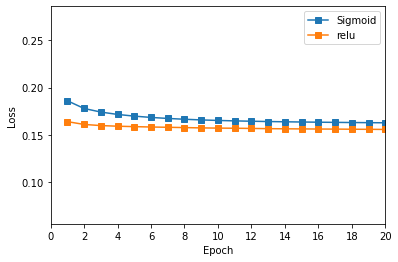

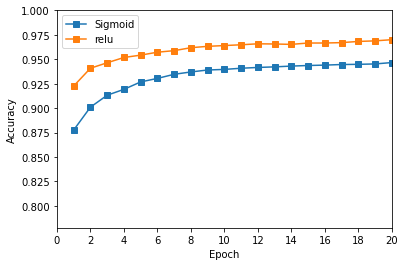

In [23]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [16]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 64))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(64, 10))

In [17]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2564	 Accuracy 0.0500
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.2162	 Accuracy 0.4163
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2063	 A

Epoch [7][20]	 Batch [500][550]	 Training Loss 0.1560	 Accuracy 0.9668

Epoch [7]	 Average training loss 0.1559	 Average training accuracy 0.9669
Epoch [7]	 Average validation loss 0.1540	 Average validation accuracy 0.9754

Epoch [8][20]	 Batch [0][550]	 Training Loss 0.1541	 Accuracy 0.9700
Epoch [8][20]	 Batch [50][550]	 Training Loss 0.1549	 Accuracy 0.9724
Epoch [8][20]	 Batch [100][550]	 Training Loss 0.1552	 Accuracy 0.9698
Epoch [8][20]	 Batch [150][550]	 Training Loss 0.1554	 Accuracy 0.9703
Epoch [8][20]	 Batch [200][550]	 Training Loss 0.1553	 Accuracy 0.9704
Epoch [8][20]	 Batch [250][550]	 Training Loss 0.1553	 Accuracy 0.9702
Epoch [8][20]	 Batch [300][550]	 Training Loss 0.1554	 Accuracy 0.9699
Epoch [8][20]	 Batch [350][550]	 Training Loss 0.1554	 Accuracy 0.9699
Epoch [8][20]	 Batch [400][550]	 Training Loss 0.1554	 Accuracy 0.9701
Epoch [8][20]	 Batch [450][550]	 Training Loss 0.1554	 Accuracy 0.9700
Epoch [8][20]	 Batch [500][550]	 Training Loss 0.1555	 Accuracy 0.96

Epoch [16][20]	 Batch [350][550]	 Training Loss 0.1534	 Accuracy 0.9805
Epoch [16][20]	 Batch [400][550]	 Training Loss 0.1534	 Accuracy 0.9806
Epoch [16][20]	 Batch [450][550]	 Training Loss 0.1534	 Accuracy 0.9802
Epoch [16][20]	 Batch [500][550]	 Training Loss 0.1535	 Accuracy 0.9797

Epoch [16]	 Average training loss 0.1535	 Average training accuracy 0.9797
Epoch [16]	 Average validation loss 0.1524	 Average validation accuracy 0.9802

Epoch [17][20]	 Batch [0][550]	 Training Loss 0.1523	 Accuracy 0.9700
Epoch [17][20]	 Batch [50][550]	 Training Loss 0.1528	 Accuracy 0.9814
Epoch [17][20]	 Batch [100][550]	 Training Loss 0.1530	 Accuracy 0.9801
Epoch [17][20]	 Batch [150][550]	 Training Loss 0.1531	 Accuracy 0.9811
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.1532	 Accuracy 0.9815
Epoch [17][20]	 Batch [250][550]	 Training Loss 0.1531	 Accuracy 0.9817
Epoch [17][20]	 Batch [300][550]	 Training Loss 0.1532	 Accuracy 0.9816
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.1532	

In [18]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9753.



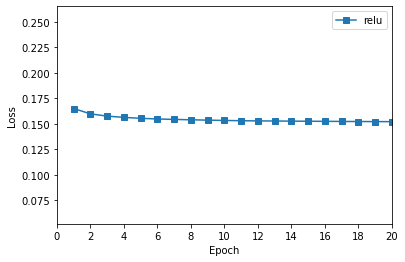

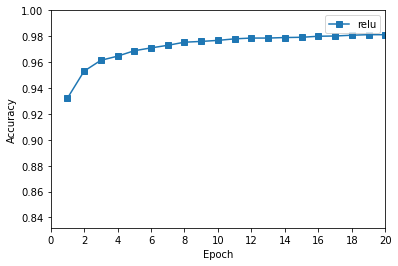

In [19]:
plot_loss_and_acc({'relu': [relu_loss, relu_acc]})